# Purpose
Create plots that summarize the data. 

In [1]:
import numpy as np
import pandas
import glob
import scipy.io

# Plot parameters 
import matplotlib
import matplotlib.pyplot as plt

font = {'family' : 'Tahoma',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')


In [2]:
acceptable_trials = ['m07_t01_15', 'm07_t03_15', 'm07_t06_15','m10_t02_16','m11_t02_16','m11_t04_16',
                   'm12_t02_16', 'm14_t03_16','m14_t05_16', 'm15_t01_16', 'm15_t03_16']

# Goal 1
Give an over view of the data using plotting.

Cell 1: Time course of data showing detected muscle activation with a red vertical line.

Cell 2: Spike Triggered Averages from individual trials plotted in 3x4 panels. 

Cell 3: All STA's for a given data type overlayed in different colors to illustrate blunting of excursion that results from averaging across trials. 

m07_t01_15


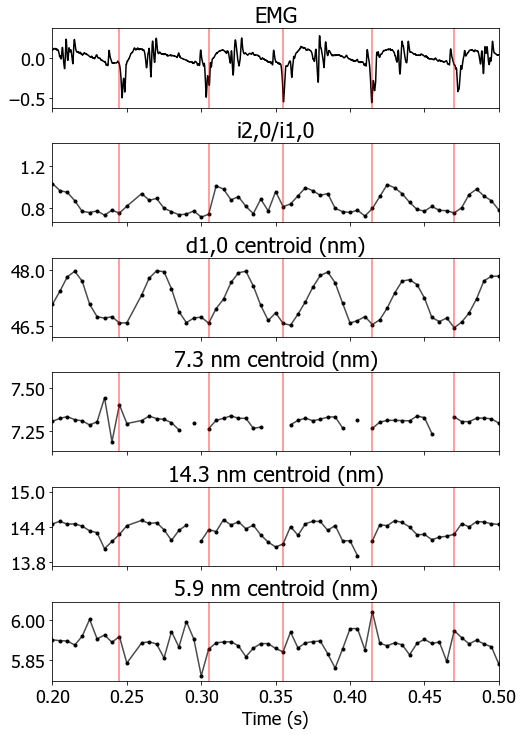

m07_t03_15


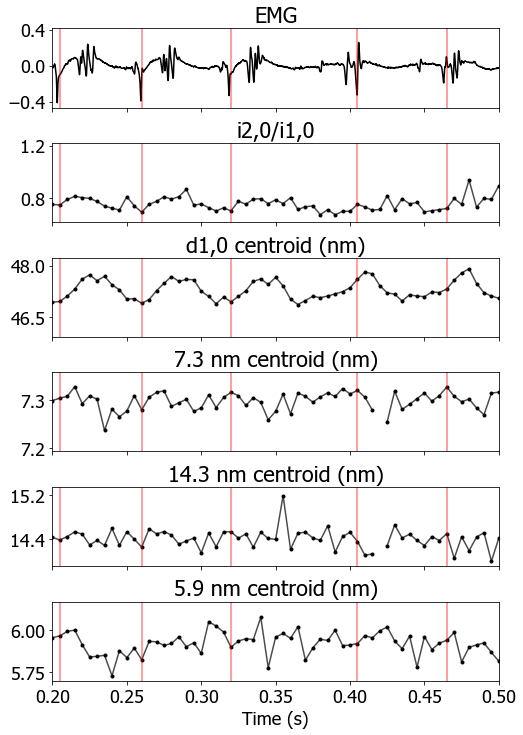

m07_t06_15


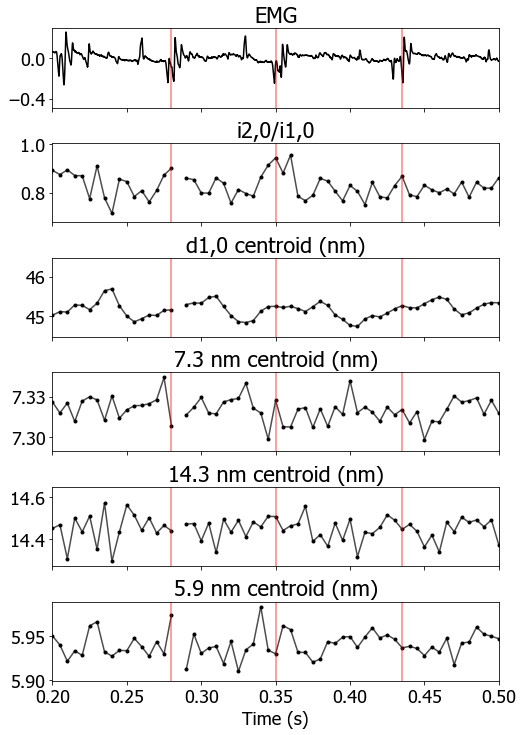

m10_t02_16


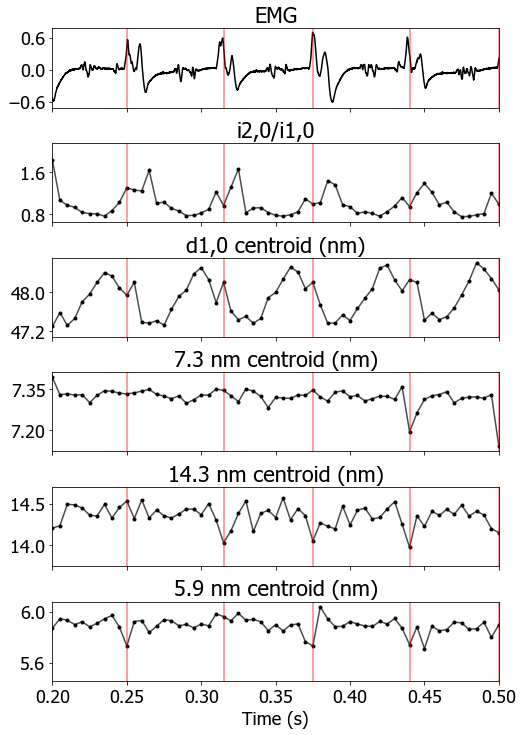

m11_t02_16


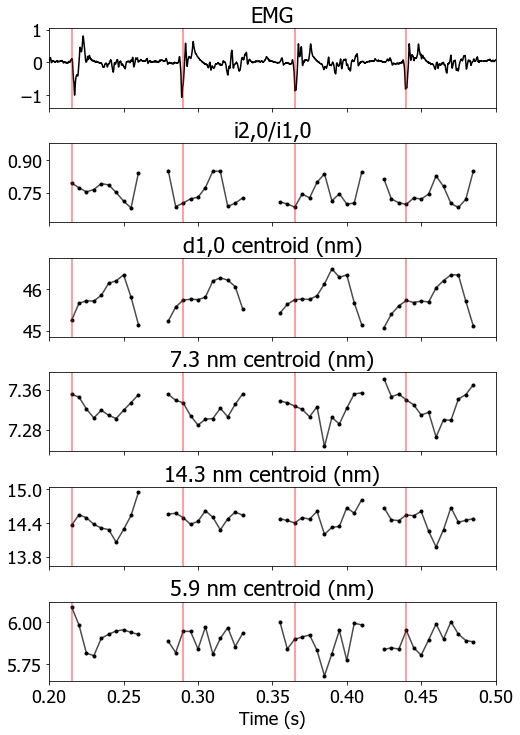

m11_t04_16


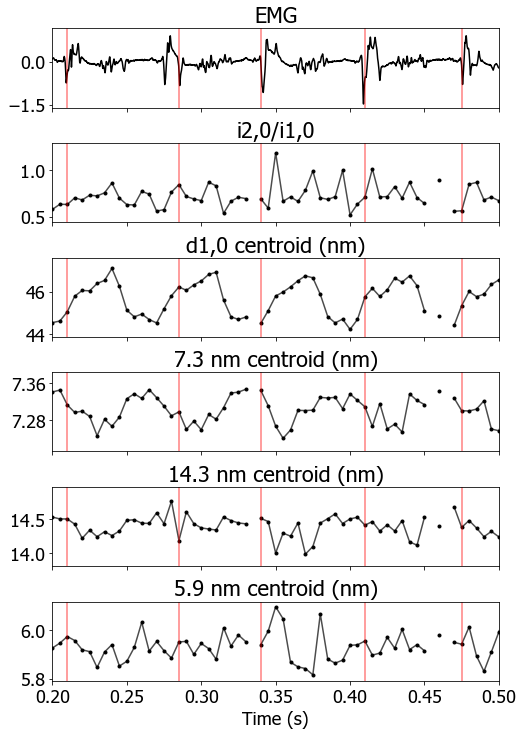

m12_t02_16


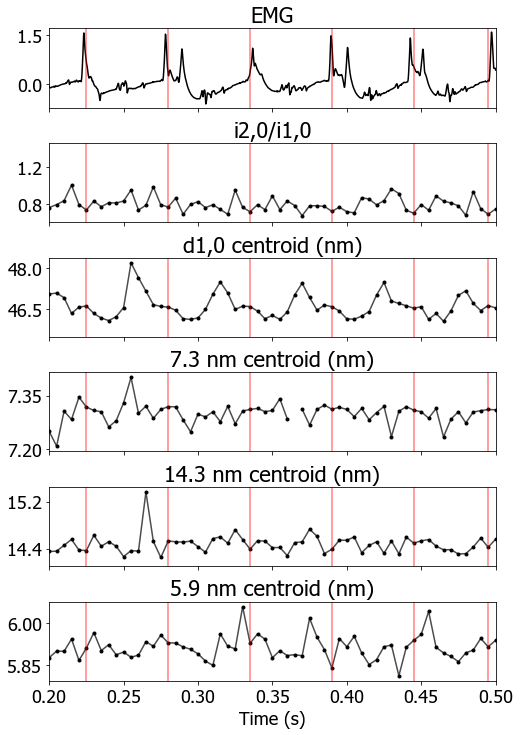

m14_t03_16


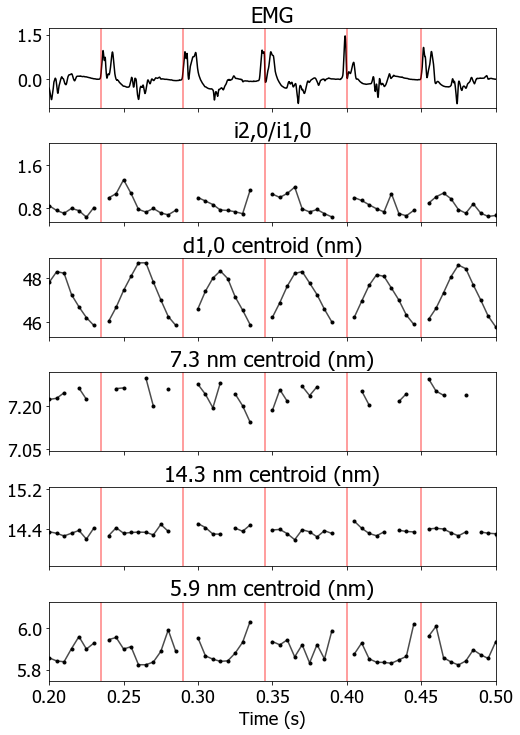

m14_t05_16


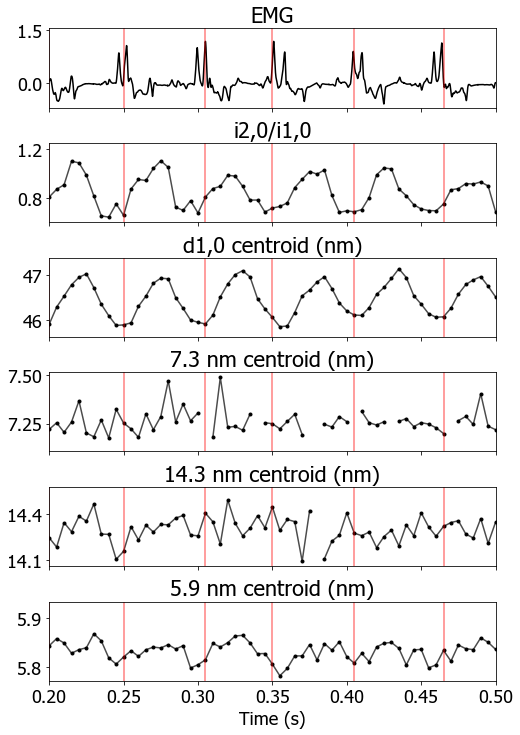

m15_t01_16


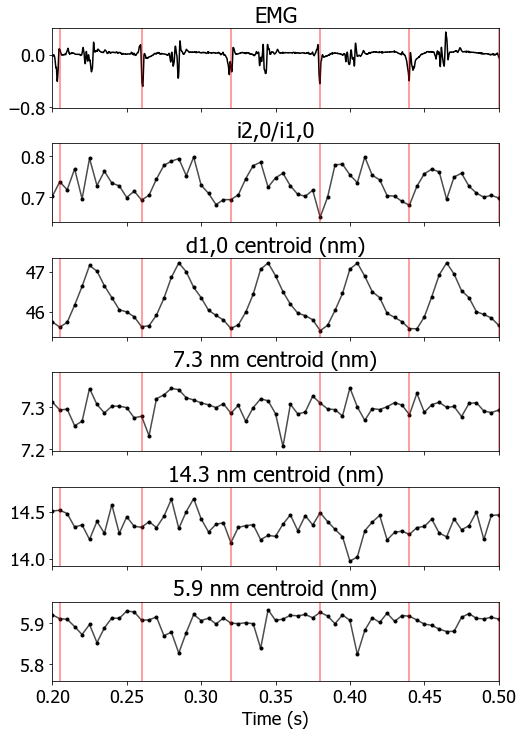

m15_t03_16


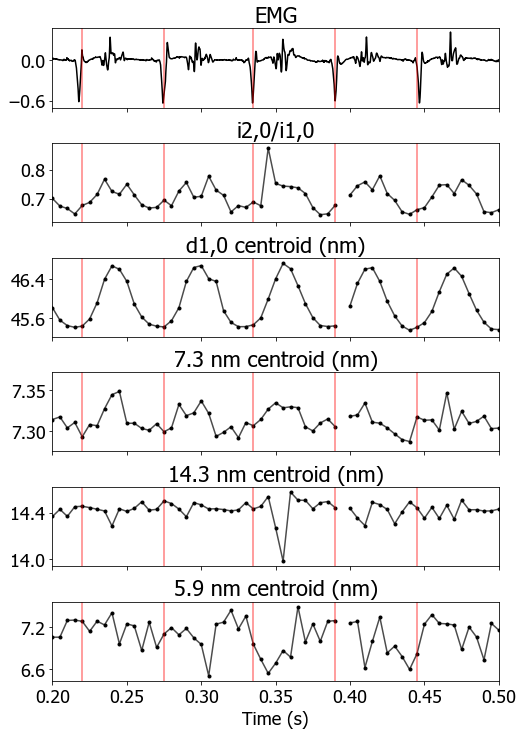

In [7]:
# Plotting the time course of lattice kinematic and EMG data, showing detected muscle activation with a red vertical line.

x_min = .2
x_max = .5
DAQ_hertz = 25000
for trial in acceptable_trials:
    print(trial)
    
    # Load in EMG data
    EMG_file = '../DataProcessing/ProcessedData/' + trial + '_EMG.csv' #'/Users/sagemalingen/Desktop/A17/Process/' + trial + '_EMG.csv'
    EMG = pandas.read_csv(EMG_file)
    
    # Load in x-ray diffraction data 
    detector_file = '../DataProcessing/ProcessedData/' + trial + '_det.csv' #'/Users/sagemalingen/Desktop/A17/Process/' + trial + '_det.csv'
    detector = pandas.read_csv(detector_file)

    peak_times = detector.seconds.where(detector.peaks > .5).dropna(how = 'all')
    
    alpha = .7 
    fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, sharey=False, sharex = True)
    fig.set_size_inches(8, 12)
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.45)
    ax1.plot(EMG.seconds, EMG.EMG_amplitude, c = 'black')
    for pt in peak_times:
        ax1.axvline(x=pt, c = 'red', alpha = .5)
    ax1.set_title('EMG')
    ax1.set_xlim(x_min,x_max)
    ax1.yaxis.set_major_locator(plt.MaxNLocator(2))
        
    ax2.plot(detector.seconds, detector.I20_I10, c = 'black', alpha = alpha)
    ax2.scatter(detector.seconds, detector.I20_I10, c = 'black', marker = '.')
    for pt in peak_times:
        ax2.axvline(x=pt, c = 'red', alpha = .5)
    ax2.set_title('i2,0/i1,0')
    ax2.set_xlim(x_min,x_max)
    ax2.yaxis.set_major_locator(plt.MaxNLocator(2))
    
    ax3.plot(detector.seconds, detector.D10, c = 'black', alpha = alpha)
    ax3.scatter(detector.seconds, detector.D10, c = 'black', marker = '.')
    for pt in peak_times:
        ax3.axvline(x=pt, c = 'red', alpha = .5)
    ax3.set_title('d1,0 centroid (nm)')
    ax3.set_xlim(x_min,x_max)
    ax3.yaxis.set_major_locator(plt.MaxNLocator(2))

    ax4.plot(detector.seconds, detector.M6_c, c = 'black', alpha = alpha)
    ax4.scatter(detector.seconds, detector.M6_c, c = 'black', marker = '.')
    for pt in peak_times:
        ax4.axvline(x=pt, c = 'red', alpha = .5)
    ax4.set_title('7.3 nm centroid (nm)')

    ax4.set_xlim(x_min,x_max)
    ax4.yaxis.set_major_locator(plt.MaxNLocator(2))
    
    ax5.plot(detector.seconds, detector.M3_c, c = 'black', alpha = alpha)
    ax5.scatter(detector.seconds, detector.M3_c, c = 'black', marker = '.')
    for pt in peak_times:
        ax5.axvline(x=pt, c = 'red', alpha = .5)
    ax5.set_title('14.3 nm centroid (nm)')
    ax5.set_xlim(x_min,x_max)
    ax5.yaxis.set_major_locator(plt.MaxNLocator(2))

    ax6.plot(detector.seconds, detector.A59_c, c = 'black', alpha = alpha)
    ax6.scatter(detector.seconds, detector.A59_c, c = 'black', marker = '.')
    for pt in peak_times:
        ax6.axvline(x=pt, c = 'red', alpha = .5)
    ax6.set_title('5.9 nm centroid (nm)')
    ax6.set_xlim(x_min,x_max)
    ax6.set_xlabel('Time (s)')
    ax6.yaxis.set_major_locator(plt.MaxNLocator(2))
    
    #plt.savefig(trial + '_traces.png', dpi = 350)
    plt.show()
    
    

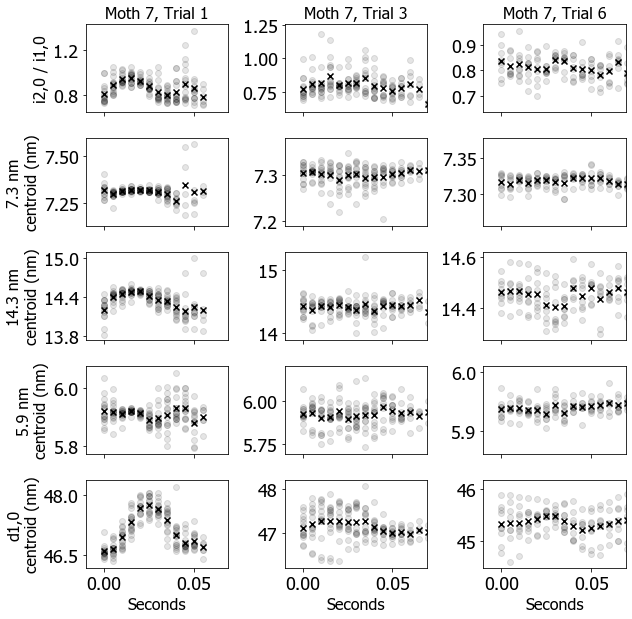

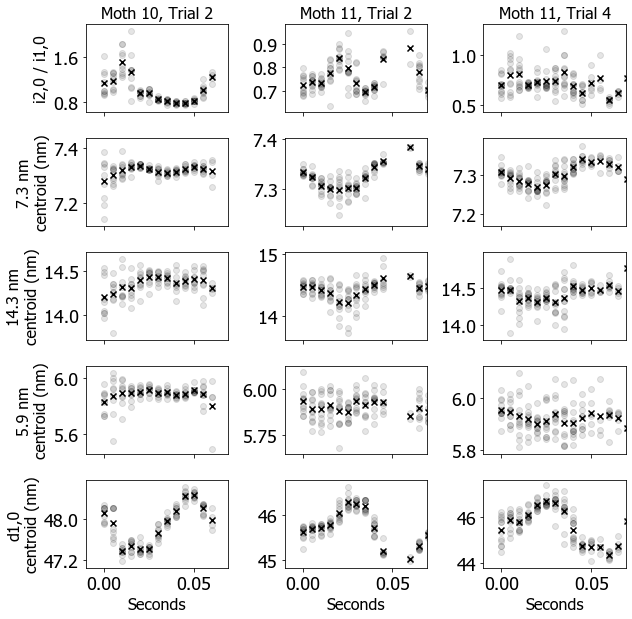

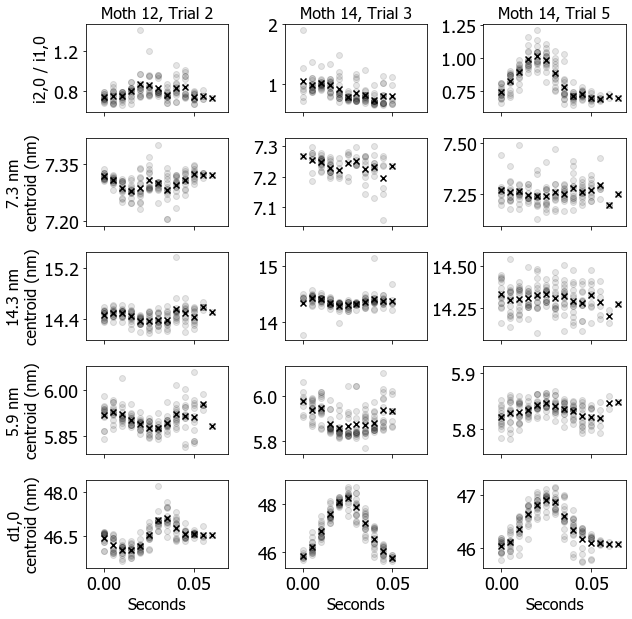

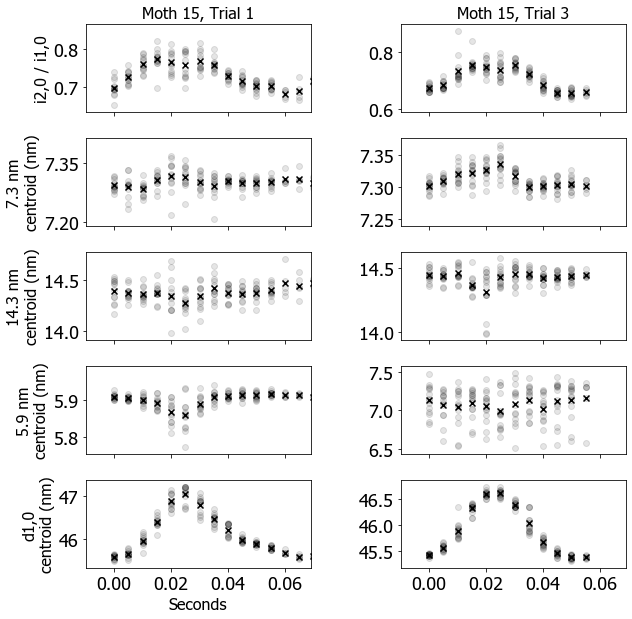

In [10]:
# Plotting STAs for each data type, each trial, in 3 col (moths), 4 row (data types) panel

# Batch acceptable trials into sets
sets = [['m07_t01_15', 'm07_t03_15', 'm07_t06_15'], ['m10_t02_16','m11_t02_16','m11_t04_16'],['m12_t02_16', 'm14_t03_16', 'm14_t05_16'], ['m15_t01_16', 'm15_t03_16']]

# Dictionary to give more intuitive printed titles
plot_titles = {'m07_t01_15':'Moth 7, Trial 1', 'm07_t03_15':'Moth 7, Trial 3', 'm07_t06_15':'Moth 7, Trial 6', 'm10_t02_16':'Moth 10, Trial 2',
         'm11_t02_16':'Moth 11, Trial 2', 'm11_t04_16':'Moth 11, Trial 4', 'm12_t02_16':'Moth 12, Trial 2', 'm14_t03_16':'Moth 14, Trial 3',
         'm14_t05_16':'Moth 14, Trial 5', 'm15_t01_16':'Moth 15, Trial 1', 'm15_t03_16':'Moth 15, Trial 3'}


set_ind = 0
for s in sets:
    f, axarr = plt.subplots(5, len(s), sharex = 'col', sharey = 'none', figsize = (10,10))
    plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)

    f.subplots_adjust(hspace=0.3)
    f.subplots_adjust(wspace=0.4)
    f.subplots_adjust(.15)

    columns = ['I20_I10', 'M6_c', 'M3_c', 'A59_c', 'D10']
    
    # Dictionary to give more intuitive printed titles
    titles = {'M6_c':'thick filament stretch', 'D10':'lattice spacing', 'A59_c':'thin filament stretch', 'M3_c':'crown repeat', 'I20_I10':
              'I20_I10', 'I11I20_I10':'I20I11_I10', 'M3_c':'crown spacing'}
    
    dict_means = {'M6_c':np.array([]), 'D10':np.array([]), 'A59_c':np.array([]), 'M3_c':np.array([]), 'I20_I10':np.array([]), 'I20I11_I10':np.array([])}

    # Looping over columns
    col_ind = -1
    for column in columns:
        col_ind += 1
        stuff_index = []
        stuff_space = []
        count = -1
        trial_ind = 0
        for trial in s:
            count += 1
            d = pandas.read_csv('../DataProcessing/ProcessedData/' + trial + '_det.csv') 
            #pandas.read_csv('/Users/sagemalingen/Desktop/A17/Process/' + trial + '_det.csv') 
            for i in np.arange(0, d.ISI.max()): 
                temp = d.where(d.ISI == i).dropna(how = 'all').reset_index()
                axarr[col_ind, trial_ind].scatter(temp.index/200, (temp[column]), c = 'black', alpha = .1)#(temp[column]/temp[column].mean() - 1)*100, c = 'black', alpha = .1)
                stuff_index.append(temp.index/200)
                stuff_space.append(temp[column])#/temp[column].mean())

            stuff_index = np.concatenate(np.array(stuff_index))
            stuff_space = np.concatenate(np.array(stuff_space))

            stuff = pandas.DataFrame({'time':stuff_index, 'data':stuff_space})
            stuff_index = []
            stuff_space = []

            means = []
            SDs = []
            times = []
            for i in np.arange(0, stuff.time.max() + 1, 1/200):
                temp = stuff.where(stuff.time == i).dropna(how = 'all')
                means.append(temp.data.mean())
                SDs.append((100*(temp.data/temp.data.mean() - 1)).std())
                times.append(i)

            dict_means[column] = means
            #axarr[col_ind, trial_ind].scatter(times, (np.array(means) - 1)*100, c = 'black', marker = 'x')
            axarr[col_ind, trial_ind].scatter(times, (np.array(means)), c = 'black', marker = 'x')
            axarr[col_ind, trial_ind].set_xlim([-0.01,.069])
            trial_ind += 1
            
    if len(s) == 3:
        axarr[0, 0].set_title(plot_titles[s[0]], fontsize = '16')
        axarr[0, 1].set_title(plot_titles[s[1]], fontsize = '16')
        axarr[0, 2].set_title(plot_titles[s[2]], fontsize = '16')

        axarr[0,0].set_ylabel('i2,0 / i1,0', fontsize = '16')
        axarr[0,0].yaxis.set_major_locator(plt.MaxNLocator(2))
        axarr[1,0].set_ylabel('7.3 nm\ncentroid (nm)', fontsize = '16')
        axarr[1,0].yaxis.set_major_locator(plt.MaxNLocator(2))
        axarr[2,0].set_ylabel('14.3 nm\ncentroid (nm)', fontsize = '16')
        axarr[2,0].yaxis.set_major_locator(plt.MaxNLocator(2))
        axarr[3,0].set_ylabel('5.9 nm\ncentroid (nm)', fontsize = '16')
        axarr[3,0].yaxis.set_major_locator(plt.MaxNLocator(2))
        axarr[4,0].set_ylabel('d1,0\ncentroid (nm)', fontsize = '16')
        axarr[4,0].yaxis.set_major_locator(plt.MaxNLocator(2))
        axarr[4,0].set_xlabel('Seconds', fontsize = '16')
        axarr[4,1].set_xlabel('Seconds', fontsize = '16')
        axarr[4,2].set_xlabel('Seconds', fontsize = '16')
        
    elif len(s) == 2:
        axarr[0, 0].set_title(plot_titles[s[0]], fontsize = '16')
        axarr[0, 1].set_title(plot_titles[s[1]], fontsize = '16')

        axarr[0,0].set_ylabel('i2,0 / i1,0', fontsize = '16')
        axarr[0,0].yaxis.set_major_locator(plt.MaxNLocator(2))
        axarr[1,0].set_ylabel('7.3 nm\ncentroid (nm)', fontsize = '16')
        axarr[1,0].yaxis.set_major_locator(plt.MaxNLocator(2))
        axarr[2,0].set_ylabel('14.3 nm\ncentroid (nm)', fontsize = '16')
        axarr[2,0].yaxis.set_major_locator(plt.MaxNLocator(2))
        axarr[3,0].set_ylabel('5.9 nm\ncentroid (nm)', fontsize = '16')
        axarr[3,0].yaxis.set_major_locator(plt.MaxNLocator(2))
        axarr[4,0].set_ylabel('d1,0\ncentroid (nm)', fontsize = '16')
        axarr[4,0].set_xlabel('Seconds', fontsize = '16')
        axarr[4,0].yaxis.set_major_locator(plt.MaxNLocator(2))
        
        
    #f.text( .05, 0.5, "Percent change", rotation='vertical',
    #horizontalalignment='center', verticalalignment='center', fontsize = '20', weight = 'bold')
    
    #f.text( .525, 0.05, "Seconds", rotation='horizontal',
    #horizontalalignment='center', verticalalignment='center', fontsize = '20', weight = 'bold')
  
    plt.savefig('/Users/Sage/Desktop/Multi_trial_STAs_set_' + str(set_ind) + '.png', dpi = 400)
    plt.show()
    set_ind += 1
    

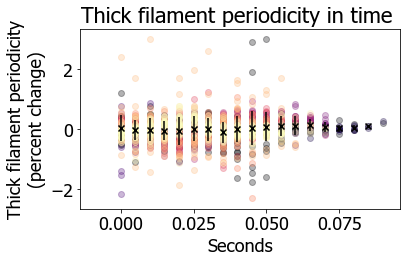

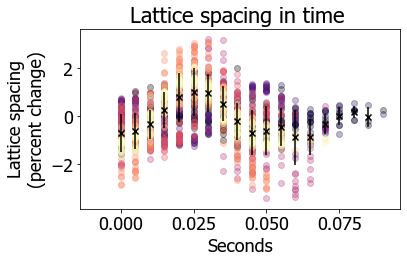

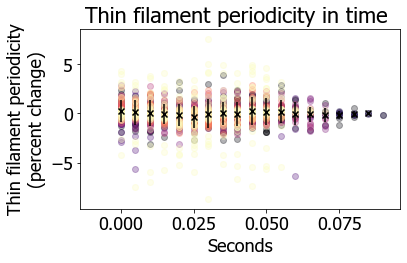

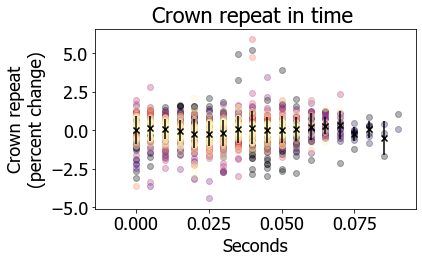

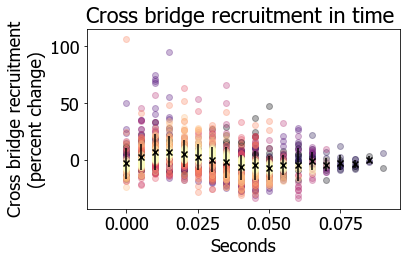

In [5]:
# Plot the STAs for a given column and all trials layered one atop the other 

columns = ['M6_c', 'D10', 'A59_c', 'M3_c', 'I20_I10']
titles = {'M6_c':'Thick filament periodicity', 'D10':'Lattice spacing', 'A59_c':'Thin filament periodicity', 'M3_c':'Crown repeat', 'I20_I10':
          'Cross bridge recruitment', 'I20I11_I10':'I20I11_I10'}
dict_means = {'M6_c':np.array([]), 'D10':np.array([]), 'A59_c':np.array([]), 'M3_c':np.array([]), 'I20_I10':np.array([]), 'I20I11_I10':np.array([])}

# Creating color list; one color per trial
colormap = plt.cm.magma
colors = [colormap(i) for i in np.linspace(-.1, 1.1, len(acceptable_trials))]

for column in columns:
    stuff_index = []
    stuff_space = []
    count = -1
    for trial in acceptable_trials:
        count += 1
        color = colors[count]
        d = pandas.read_csv('../DataProcessing/ProcessedData/' + trial + '_det.csv') 
    #pandas.read_csv('/Users/sagemalingen/Desktop/A17/Process/' + trial + '_det.csv') 
        for i in d.ISI.drop_duplicates():
            temp = d.where(d.ISI == i).dropna(how = 'all').reset_index()
            plt.scatter(temp.index/200, 100*(temp[column]/temp[column].mean() - 1), c = color, alpha = .3) 
            stuff_index.append(temp.index/200)
            stuff_space.append(100*(temp[column]/temp[column].mean() - 1)) # Perecent

        plt.ylabel(titles[column] + '\n(percent change)')
        plt.xlabel('Seconds')
        plt.title(titles[column] + ' in time ')


    stuff_index = np.concatenate(np.array(stuff_index))
    stuff_space = np.concatenate(np.array(stuff_space))

    stuff = pandas.DataFrame({'time':stuff_index, 'data':stuff_space})
    stuff_index = []
    stuff_space = []

    means = []
    SDs = []
    times = []
    for i in np.arange(0, stuff.time.max(), 1/200):
        temp = stuff.where(stuff.time == i).dropna(how = 'all')
        means.append(temp.data.mean())
        SDs.append((temp.data).std())
        times.append(i)

    dict_means[column] = means
    plt.scatter(times, means, c = 'black', marker = 'x')
    plt.errorbar(times, means, SDs, linestyle = 'none', c = 'black')
    plt.tight_layout()
    plt.show()
    

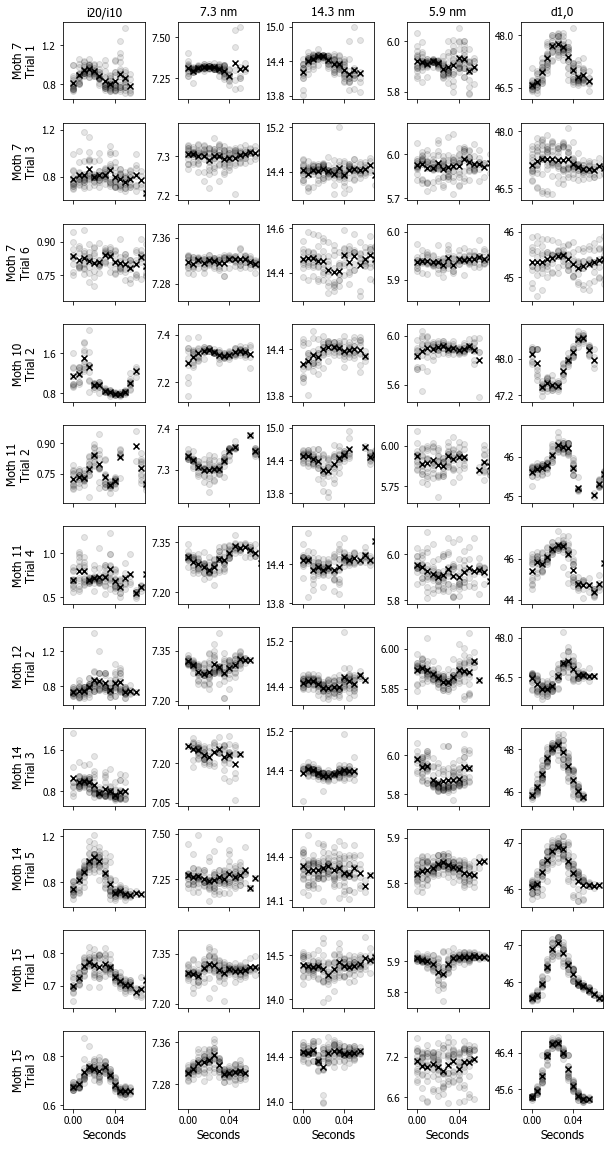

In [4]:
# Create a panel of all STAs that will appear in the supplement

# First adjust the text parameters for the plot

font = {'family' : 'Tahoma',
        'weight' : 'normal',
        'size'   : 10}

matplotlib.rc('font', **font)

titles = {'M6_c':'thick filament stretch', 'D10':'lattice spacing', 'A59_c':'thin filament stretch', 'M3_c':'crown repeat', 'I20_I10':
          'I20_I10', 'I11I20_I10':'I20I11_I10', 'M3_c':'crown spacing'}


plot_titles = {'m07_t01_15':'Moth 7\nTrial 1', 'm07_t03_15':'Moth 7\nTrial 3', 'm07_t06_15':'Moth 7\nTrial 6', 'm10_t02_16':'Moth 10\nTrial 2',
         'm11_t02_16':'Moth 11\nTrial 2', 'm11_t04_16':'Moth 11\nTrial 4', 'm12_t02_16':'Moth 12\nTrial 2', 'm14_t03_16':'Moth 14\nTrial 3',
         'm14_t05_16':'Moth 14\nTrial 5', 'm15_t01_16':'Moth 15\nTrial 1', 'm15_t03_16':'Moth 15\nTrial 3'}


columns = ['I20_I10', 'M6_c', 'M3_c', 'A59_c', 'D10']
set_ind = 0
f, axarr = plt.subplots(len(acceptable_trials), len(columns), sharex = 'col', sharey = 'none', figsize = (10,20))
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)

f.subplots_adjust(hspace=0.3)
f.subplots_adjust(wspace=0.4)
f.subplots_adjust(.15)

col_ind = 0
for column in columns:
    trial_ind = 0
    for trial in acceptable_trials:
        dict_means = {'M6_c':np.array([]), 'D10':np.array([]), 'A59_c':np.array([]), 'M3_c':np.array([]), 'I20_I10':np.array([]), 'I20I11_I10':np.array([])}

        d = pandas.read_csv('../DataProcessing/ProcessedData/' + trial + '_det.csv') 
        
        stuff_index = []
        stuff_space = []
        count = 0 
        for i in np.arange(0, d.ISI.max()):
            temp = d.where(d.ISI == i).dropna(how = 'all').reset_index()
            axarr[trial_ind, col_ind].scatter(temp.index/200, (temp[column]), c = 'black', alpha = .1)
            stuff_index.append(temp.index/200)
            stuff_space.append(temp[column])

        stuff_index = np.concatenate(np.array(stuff_index))
        stuff_space = np.concatenate(np.array(stuff_space))
        stuff = pandas.DataFrame({'time':stuff_index, 'data':stuff_space})

        means = []
        SDs = []
        times = []
        for i in np.arange(0, stuff.time.max() + 1, 1/200):
            temp = stuff.where(stuff.time == i).dropna(how = 'all')
            means.append(temp.data.mean())
            #SDs.append((100*(temp.data/temp.data.mean() - 1)).std())
            times.append(i)
            
        dict_means[column] = means    
        
        
        axarr[trial_ind, col_ind].scatter(times, (np.array(means)), c = 'black', marker = 'x')
        axarr[trial_ind, col_ind].set_xlim([-0.01,.069])
        
        trial_ind += 1
        count += 1
    col_ind += 1
    
axarr[0,0].set_title('i20/i10', fontsize = '12')
axarr[0,1].set_title('7.3 nm', fontsize = '12')
axarr[0,2].set_title('14.3 nm', fontsize = '12')
axarr[0,3].set_title('5.9 nm', fontsize = '12')
axarr[0,4].set_title('d1,0', fontsize = '12')

count = 0 
for t in acceptable_trials:
    axarr[count, 0].set_ylabel(plot_titles[t], fontsize = '12')
    count += 1

axarr[10,0].set_xlabel('Seconds', fontsize = '12')
axarr[10,1].set_xlabel('Seconds', fontsize = '12')
axarr[10,2].set_xlabel('Seconds', fontsize = '12')
axarr[10,3].set_xlabel('Seconds', fontsize = '12')
axarr[10,4].set_xlabel('Seconds', fontsize = '12') 

for axi in axarr.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(2))
    axi.yaxis.set_major_locator(plt.MaxNLocator(2)) 
       
plt.savefig('supplement_STA_panel.png', dpi = 350)    
 